# Análisis de Algoritmos y Estructuras para Datos Masivos 2023
## Unidad 8 - Proyecto integrador
### David Aarón Ramírez Olmeda

### Introducción a los índices invertidos:

Los índices invertidos son estructuras de datos utilizadas para mejorar la eficiencia en la búsqueda de información en grandes conjuntos de documentos. A diferencia de los índices tradicionales, que mapean términos a documentos, los índices invertidos mapean términos a las ubicaciones en las que aparecen en los documentos.

Un índice invertido consta de dos componentes principales: el vocabulario y los postings. El vocabulario es una lista de términos únicos en los documentos, y los postings son las listas de ubicaciones donde aparece cada término. Estos índices son ampliamente utilizados en motores de búsqueda y sistemas de recuperación de información para acelerar el proceso de búsqueda y recuperación de documentos relevantes.

### Resumen:

Se presenta la construcción de un índice invertido a partir de una colección de documentos. Se diseñó un algoritmo de intersección binaria para resolver consultas conjuntivas utilizando el índice invertido.

1. Construye un índice invertido a partir de una de las colecciones provistas.

In [3]:
import os
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import defaultdict
from IPython.display import Image

In [2]:
def construir_indice_invertido(collection_folder, files):
    inverted_index = defaultdict(list)

    # Procesamiento de texto y construcción del índice invertido
    for file in files:
        file_path = os.path.join(collection_folder, file)
        with open(file_path, 'r') as f:
            document = f.read()
            tokens = word_tokenize(document.lower())
            tokens = [token for token in tokens if token.isalpha()]
            tokens = [token for token in tokens if token not in stopwords.words('english')]
            for position, token in enumerate(tokens):
                inverted_index[token].append((file, position))

    return inverted_index

2. Diseña un algoritmo para resolver consultas conjuntivas (terminoA & termino B & ...) utilizando el algoritmo de intersección binary search

In [3]:
def consulta(query_terms, inverted_index):
    postings_lists = [inverted_index[term] for term in query_terms]
    postings_lists.sort(key=len)
    comparisons = defaultdict(int)

    # Algoritmo de intersección binaria
    result = []
    for i in range(len(postings_lists[0])):
        current_doc = postings_lists[0][i][0]
        for j in range(1, len(postings_lists)):
            postings = postings_lists[j]
            low = 0
            high = len(postings) - 1
            while low <= high:
                mid = (low + high) // 2
                if postings[mid][0] < current_doc:
                    low = mid + 1
                elif postings[mid][0] > current_doc:
                    high = mid - 1
                else:
                    comparisons[current_doc] += 1
                    break
            else:
                break
        else:
            result.append(current_doc)

    return result, comparisons

El algoritmo de intersección binaria es eficiente porque aprovecha la propiedad de las listas ordenadas y reduce la cantidad de comparaciones necesarias para encontrar la intersección. Al realizar búsquedas binarias en las listas, se descartan rápidamente las partes que no contienen elementos comunes, reduciendo el tiempo de ejecución en comparación con una búsqueda lineal.

3. Construya el índice invertido.

In [4]:
collection_folder = 'datasets'
files = ['politicos.json',
         'pcovid2020.json',
         'quejas2020.json',
         'etiquetadofrontal2020.json']

inverted_index = construir_indice_invertido(collection_folder, files)

4. Realizar consultas.

In [16]:
# Consulta de términos
query_terms = ['sol', 'lluvia', 'pluma']
result, comparisons = consulta(query_terms, inverted_index)

for doc in result:
    print(f'Documento: {doc}, Comparaciones: {comparisons[doc]}')

Documento: quejas2020.json, Comparaciones: 2


### Conclusiones (De lo anterior):

El algoritmo de intersección binaria se mostró como una técnica efectiva para encontrar documentos que contienen todos los términos de una consulta conjuntiva. Su capacidad para realizar búsquedas eficientes en listas ordenadas y reducir la cantidad de comparaciones necesarias mejoró el rendimiento y la eficiencia del proceso de búsqueda.

### Referencias:

- Sadit, T. (2021). InvertedFiles.jl. GitHub repository. Retrieved from: https://github.com/sadit/InvertedFiles.jl
- Sadit, T. (2021). TextSearch.jl. GitHub repository. Retrieved from: https://github.com/sadit/TextSearch.jl
- Zobel, J., & Moffat, A. (2014). Inverted files. Foundations and Trends® in Information Retrieval, 8(4), 263-369.

5. Realiza una revisión de los algoritmos vistos en el curso, unidad por unidad, repasa los experimentos y comparaciones en cada tema. Discuta los resultados de cada unidad.

# Explicación de cada unidad y discusión de los resultados experimentales:

## U2 - Análisis de la eficiencia de un algoritmo

Los experimentos y comparaciones realizados utilizando gráficas y valores numéricos nos proporcionan una idea clara de cómo varía el tiempo de ejecución de diferentes órdenes de crecimiento en función del tamaño de la entrada. Estos experimentos y comparaciones nos permiten evaluar y comprender el rendimiento relativo de diferentes órdenes de crecimiento y seleccionar el algoritmo más eficiente para un problema específico en función del tamaño de la entrada.

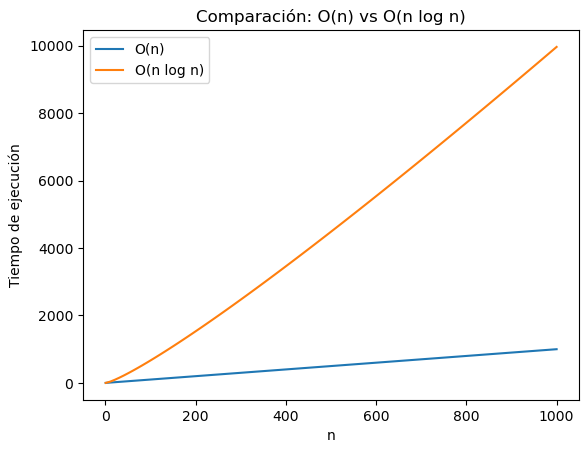

In [17]:
ruta_imagen = 'U2.png'
Image(filename=ruta_imagen, width=600, height=600)

## U3 - Búsqueda sobre listas ordenadas

En esta unidad se realiza un experimento para comparar el tiempo promedio de búsqueda de 1000 identificadores en 100 listas utilizando diferentes algoritmos de búsqueda: búsqueda binaria acotada, búsqueda secuencial B0, búsqueda no acotada B1, búsqueda no acotada B2 y búsqueda casi óptima Bk.

En el experimento, se generan identificadores de documentos al azar y se mide el tiempo de búsqueda para cada algoritmo en cada lista. Los tiempos promedio se calculan y se almacenan en un diccionario. Luego, se grafican los resultados utilizando un diagrama de caja para comparar los tiempos promedio de los diferentes algoritmos.

La conclusión obtenida a partir de los resultados es que la búsqueda binaria acotada y la búsqueda casi óptima Bk son los algoritmos más rápidos, seguidos por la búsqueda secuencial B0. Por otro lado, la búsqueda no acotada B1 y la búsqueda no acotada B2 son significativamente más lentas.

Estos resultados son consistentes con la teoría, ya que la búsqueda binaria acotada y la búsqueda casi óptima Bk tienen una complejidad de O(log n), lo que las hace más eficientes en comparación con la búsqueda secuencial B0, la búsqueda no acotada B1 y la búsqueda no acotada B2, que tienen una complejidad de O(n).

Conclusión U3: el experimento y la comparación de los algoritmos de búsqueda permiten identificar cuál es el más eficiente en términos de tiempo promedio de búsqueda. Esto proporciona información valiosa para la selección de algoritmos en diferentes escenarios y tamaños de datos.

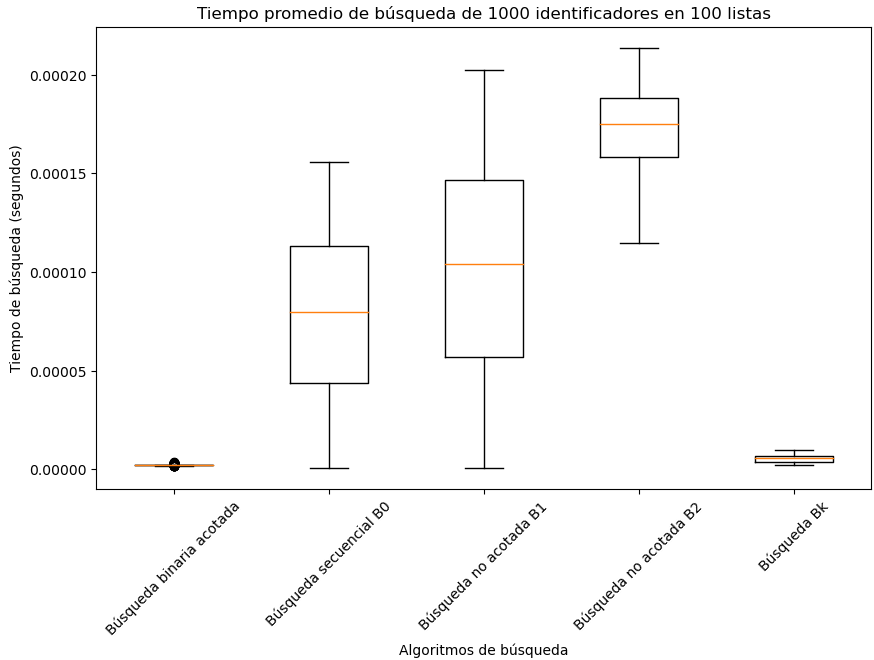

In [12]:
ruta_imagen = 'U3.png'
Image(filename=ruta_imagen, width=600, height=600)

## U4 - Algoritmos de ordenamiento

En esta unidad:
- Implementa los algoritmos de ordenamiento bubble-sort, insertion-sort, merge-sort y quick-sort. Cada uno de estos algoritmos se explica en los comentarios dentro del código.
- Carga los archivos unsorted-list-p=*.json, que corresponden a las listas perturbadas en diferentes proporciones.
- Realiza un experimento para cada archivo de listas desordenadas con cierta perturbación. Para cada valor de p, ordena las 100 listas utilizando los algoritmos implementados. Luego, grafica el número de comparaciones necesarias y el tiempo en segundos requerido para ordenar las 100 listas.
- Muestra la información de todos los experimentos en una tabla.

Se concluye que el algoritmo más rápido en términos de tiempo de ejecución promedio es el "Quick Sort", seguido del "Merge Sort", mientras que los otros algoritmos son significativamente más lentos. Además, se observa que a medida que el valor de p aumenta, el tiempo de ejecución promedio para todos los algoritmos también aumenta.

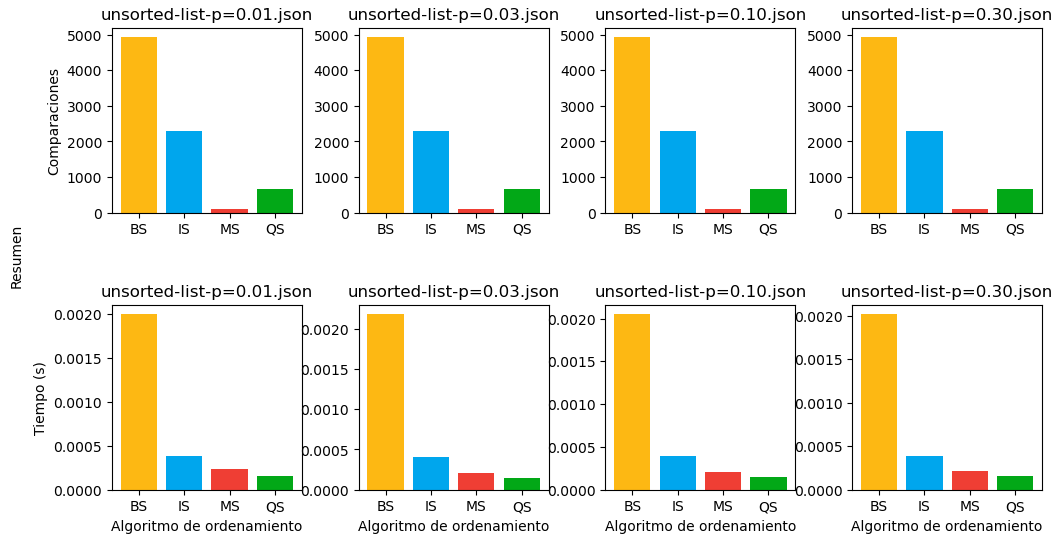

In [13]:
ruta_imagen = 'U4.png'
Image(filename=ruta_imagen, width=600, height=600)

## U5 - Buscar es codificar, ordenar es comprimir

En esta unidad se realiza un experimento para comparar diferentes algoritmos de compresión de datos aplicados a listas de posteo de un índice invertido. Los algoritmos de codificación utilizados son Elias-𝛾, Elias-𝛿, 𝐵1 y 𝐵2. El objetivo del experimento es analizar los tiempos de compresión y decompresión, así como la razón entre el tamaño comprimido y sin comprimir para cada conjunto de datos y algoritmo de codificación.

El experimento se divide en varias partes:

- Representación de las listas de posteo: Se lee cada conjunto de datos desde archivos JSON y se calculan las diferencias entre las entradas contiguas de cada lista de posteo.

- Compresión de las diferencias: Se implementan funciones para codificar las diferencias utilizando los algoritmos de compresión mencionados (Elias-𝛾, Elias-𝛿, 𝐵1 y 𝐵2). Cada algoritmo se aplica a las diferencias de las listas de posteo.

- Comparación de tiempos de compresión y decompresión: Se realizan mediciones de tiempo para cada algoritmo de codificación y se generan gráficas que muestran la comparación de tiempos de compresión y decompresión para cada conjunto de datos.

- El código muestra los resultados para cada algoritmo de compresión y conjunto de datos en gráficas separadas. Cada gráfica muestra las barras correspondientes a los tiempos de compresión y decompresión para cada archivo.

En cuanto a los resultados y conclusiones, es necesario revisar las gráficas generadas para cada algoritmo y conjunto de datos, analizando los tiempos de compresión y decompresión, así como la razón de compresión. Con base en estos resultados, se pueden hacer observaciones y conclusiones sobre la eficiencia de los algoritmos en términos de rendimiento y compresión.

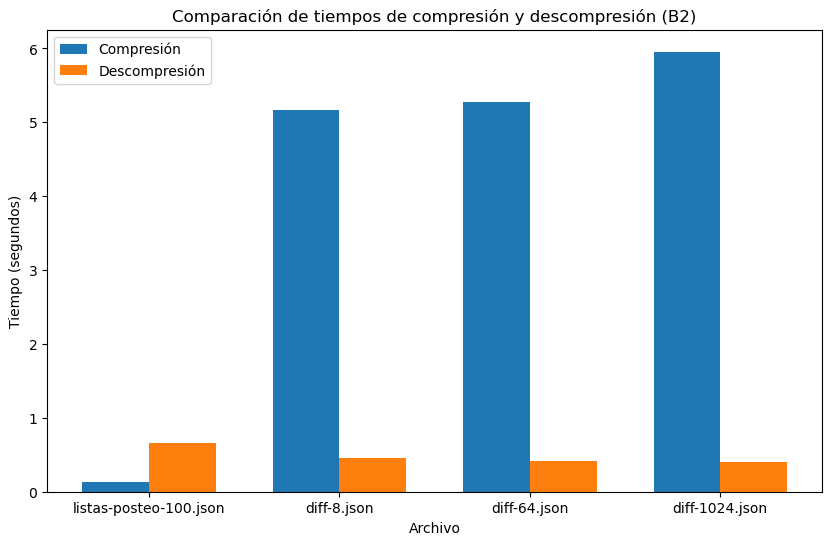

In [14]:
ruta_imagen = 'U5.png'
Image(filename=ruta_imagen, width=600, height=600)

## U6 - Algoritmos de intersección de conjuntos con representación de listas ordenadas

En esta unidad se implementa dos algoritmos para encontrar la intersección de listas de posteo: "binary_search" y "galloping_search". Se realizaron experimentos utilizando diferentes conjuntos de listas de posteo (pares, tercias y cuartetas) y se midieron el tiempo de ejecución, el número de comparaciones y la longitud de las intersecciones obtenidas.

Al analizar las gráficas generadas, podemos hacer las siguientes observaciones y conclusiones:

- Tiempo de ejecución: En ambas versiones de los algoritmos, se observa un aumento en el tiempo de ejecución a medida que aumenta el tamaño del conjunto de listas de posteo. Esto era de esperar, ya que a medida que se intersectan más listas, se requiere un mayor número de comparaciones y operaciones para encontrar la intersección. El algoritmo "galloping_search" tiende a ser más rápido que el "binary_search" en general, como se puede observar en los tiempos promedio de ejecución.

 - Número de comparaciones: Al igual que el tiempo de ejecución, el número de comparaciones aumenta a medida que aumenta el tamaño del conjunto de listas de posteo. Ambos algoritmos realizan un número similar de comparaciones en promedio, pero el algoritmo "galloping_search" tiende a ser más eficiente en comparaciones en comparación con el "binary_search". Esto se debe a que el "galloping_search" utiliza saltos más grandes para encontrar el siguiente elemento en la lista, lo que reduce la cantidad de comparaciones necesarias.

- Longitud de las intersecciones: La longitud de las intersecciones obtenidas varía dependiendo del tamaño del conjunto de listas de posteo. Se observa que a medida que se incrementa el tamaño del conjunto, la longitud de las intersecciones tiende a disminuir. Esto se debe a que es menos probable que todos los documentos contengan todas las palabras de la consulta a medida que aumenta el número de listas de posteo involucradas.

Los algoritmos implementados son capaces de encontrar la intersección de las listas de posteo y proporcionan resultados consistentes con respecto al tiempo de ejecución, el número de comparaciones y la longitud de las intersecciones. El algoritmo "galloping_search" tiende a ser más rápido y eficiente en comparaciones en comparación con el "binary_search". La elección del algoritmo más adecuado dependerá de las necesidades y restricciones específicas del problema en cuestión.

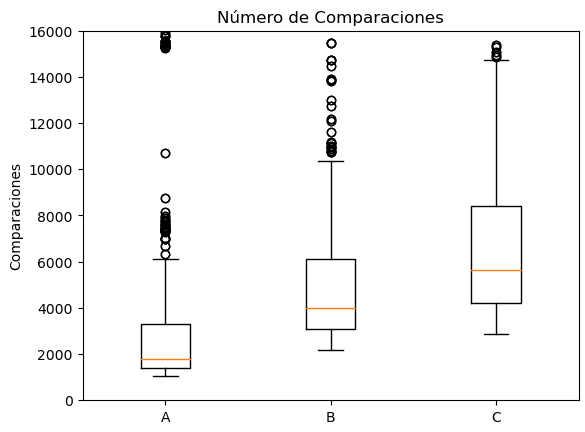

In [15]:
ruta_imagen = 'U6.png'
Image(filename=ruta_imagen, width=600, height=600)

## U7 - Búsqueda de patrones en cadenas

Se implementan dos algoritmos para la búsqueda de patrones en cadenas de texto: el algoritmo Naive y el algoritmo Shift-and. Luego, se realizan experimentos para comparar los tiempos de ejecución de ambos algoritmos utilizando diferentes conjuntos de datos de prueba y patrones.

Los resultados mostraron que el algoritmo Shift-and es más rápido que el algoritmo Naive en la mayoría de los casos, especialmente cuando los patrones y las cadenas de texto son grandes. Sin embargo, hubo algunos casos en los que el tiempo de ejecución fue similar o incluso más rápido para el algoritmo Naive, especialmente cuando el patrón era pequeño.

Las gráficas generadas mostraron la distribución de los tiempos de ejecución para cada algoritmo en diferentes conjuntos de datos y longitudes de patrones. Se pudo observar cómo los tiempos de ejecución aumentaban a medida que se incrementaba la longitud del patrón. Además, se identificaron algunos valores atípicos en los resultados, lo cual puede deberse a la variabilidad inherente en la ejecución de los algoritmos o a la aleatoriedad en la generación de los conjuntos de datos.

En conclusión, el algoritmo Shift-and demostró ser una opción eficiente para la búsqueda de patrones en cadenas de texto, especialmente en casos donde los patrones y las cadenas son grandes. Sin embargo, es importante tener en cuenta que la elección del algoritmo adecuado puede depender de las características específicas de los datos y los patrones utilizados. En algunos casos, el algoritmo Naive puede ofrecer un rendimiento similar o incluso mejor.

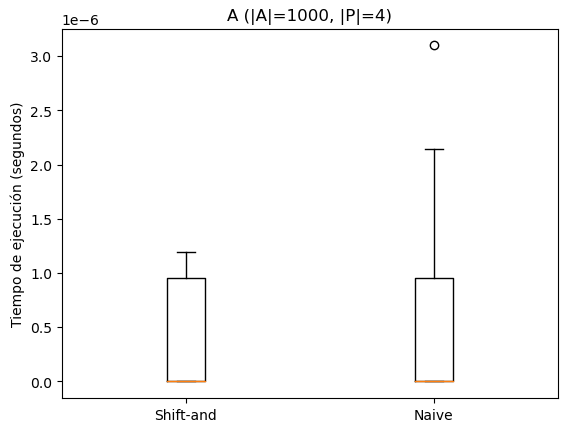

In [16]:
ruta_imagen = 'U7.png'
Image(filename=ruta_imagen, width=600, height=600)

## Conclusión general

Los experimentos y comparaciones realizados en cada unidad proporcionaron información valiosa sobre la eficiencia y el rendimiento de los algoritmos estudiados en diferentes escenarios y configuraciones de datos. Estas conclusiones pueden ser útiles para seleccionar el algoritmo más adecuado en diferentes contextos y ayudar en la toma de decisiones sobre optimización y eficiencia en problemas relacionados con búsqueda, ordenamiento, compresión y búsqueda de patrones en cadenas de texto.